In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

Описание колонок:

1. id - уникальный идентификатор для каждого пациента
2. age - возраст (в годах)
3. origin (место учебы)
4. sex - пол (1 = мужчина; 0 = женщина)
5. cp - тип боли в груди (0 = типичная стенокардия (присутствуют все критерии), 1 = атипичная стенокардия (удовлетворение двум из трех критериев), 2 = неангинальная боль (удовлетворение менее одного критерия), 3 = бессимптомно (ни один из критериев не удовлетворен))

    _Существует три критерия для классификации различных типов стенокардии (боли в груди) по трем категориям:_
    _1. Локализация: боль в груди возникает в загрудинной части тела._
    _2. Причина: Боль возникает после эмоционального/физического стресса._
    _3. Облегчение: боль проходит после приема нитроглицерина и/или отдыха._

6. trestbps - артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу)
7. chol - уровень холестерина в сыворотке крови в мг/дл.
8. fbs - уровень сахара в крови натощак > 120 мг/дл (вероятно, диабет) (1 = True; 0 = False)
9. restecg - результаты электрокардиограммы покоя (0 = нормальное, 1 = наличие аномалий ST-T (инверсия зубца T и/или элевация или депрессия ST > 0,05 мВ), 2 = показывает вероятную или определенную гипертрофию левого желудочка по критериям Эстеса.)
10. thalach - достигается максимальная частота сердечных сокращений
11. exang - стенокардия, вызванная физической нагрузкой (1 = True; 0 = False)
12. oldpeak - депрессия ST, вызванная нагрузкой, относительно покоя (в мм, достигается путем вычитания точек самого нижнего сегмента ST во время нагрузки и покоя)
13. slope - наклон пикового сегмента ST при нагрузке, аномалии ST-T считаются важнейшим индикатором для выявления наличия ишемии (0 = восходящий, 1 = плоский, 2 = нисходящий)
14. ca - количество крупных сосудов (0-3), окрашенных при рентгеноскопии. Основные сердечные сосуды следующие: аорта, верхняя полая вена, нижняя полая вена, легочная артерия (бедная кислородом кровь --> легкие), легочные вены (богатая кислородом кровь --> сердце) и коронарные артерии (снабжают кровью ткань сердца). Радиоактивный краситель вводится в организм с последующим рентгеновским исследованием для выявления любых структурных аномалий, присутствующих в сердце. Количество окрашенных сосудов положительно коррелирует с наличием заболеваний сердца.
15. thal - тестирование таллия — это метод, при котором радиоактивный элемент таллий (Tl) вводится в организм посредством внутривенной инъекции с последующей ядерной визуализацией сердца с помощью гамма-камеры, которая выявляет структурные проблемы и аномалии сердца, показывая, был ли изотоп поглощается сердечной тканью в условиях высокого (упражнения) и низкого (отдых) стресса (0 = нормально, 1 = фиксированный дефект (ткани сердца не способны усваивать таллий как при нагрузке, так и в состоянии покоя), 2 = обратимый дефект (ткань сердца неспособна поглощать таллий только в рамках части теста с нагрузкой))
16. num - прогнозируемый атрибут (0 = нет заболевания, 1 = заболевание)

### Загрузка и исследование данных

In [283]:
# Загрузка набора данных
df = pd.read_csv('data/heart_disease_uci.csv')

In [284]:
# Отображение первых нескольких строк набора данных
print(df.head())

   id  age     sex     origin               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [285]:
# Отображение статистики по набору данных
print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [286]:
# Отображение информации о наборе данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   origin    920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [287]:
# Проверка на наличие пропущенных значений
print(df.isnull().sum())

id            0
age           0
sex           0
origin        0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


### Предобработка данных

In [288]:
# Удаление столбцов с количеством пропусков более 30%
threshold = 0.3 * len(df)
df = df.loc[:, df.isnull().sum() <= threshold]

In [289]:
# Проверка на пропуски после удаления столбцов
missing_values_after_cols_removal = df.isnull().sum()
print(missing_values_after_cols_removal)

id           0
age          0
sex          0
origin       0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
num          0
dtype: int64


In [290]:
# Удаление строк с пропусками
df = df.dropna()

In [291]:
# Проверка на пропуски после удаления строк
missing_values_after_rows_removal = df.isnull().sum()
print(missing_values_after_rows_removal)
print(df.shape)

id          0
age         0
sex         0
origin      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64
(740, 13)


In [292]:
# Замена выбросов на границы интервала с использованием метода IQR
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Замена выбросов на границы
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [293]:
# Отображение формы набора данных после обработки выбросов
print(df.shape)

(740, 13)


In [294]:
# Удаление столбца 'id'
if 'id' in df.columns:
    df.drop(columns='id', inplace=True)


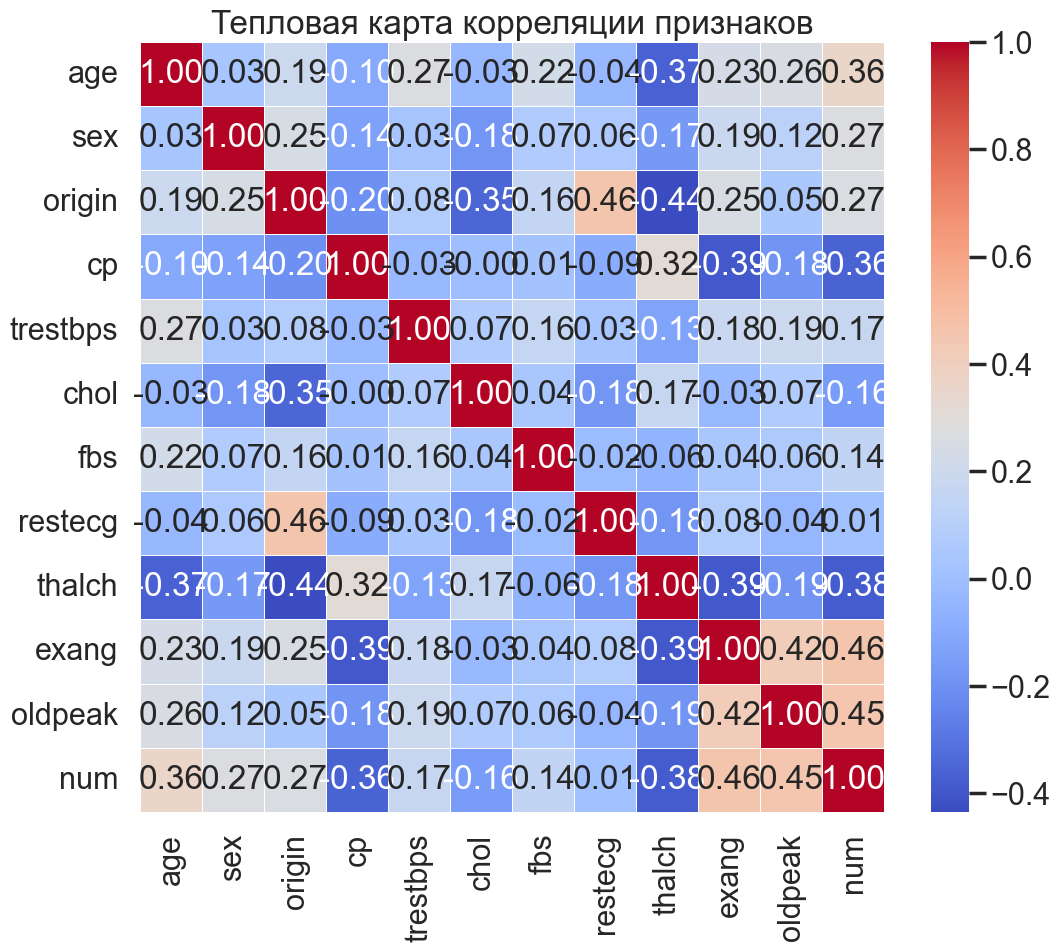

In [295]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Тепловая карта корреляции признаков
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляции признаков')
plt.show()

_Cледует отметить, что этот конкретный набор данных в основном состоит из категориальных признаков, поэтому большинство коэффициентов корреляции на приведенном выше графике не будут иметь смысла, особенно для точек, которые содержат небинарные категориальные признаки._

### Инженерия признаков и разделение данных

In [296]:
# Разделение признаков и целевой переменной
target_column = 'num'  # Замените на правильное имя столбца, если оно отличается
X = df.drop(columns=target_column)
y = df[target_column]

In [297]:
# Преобразование многоклассовой целевой переменной в бинарную
y_binary = np.where(y > 0, 1, 0).astype(int)

In [298]:
# Кодирование категориальных признаков
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_data = encoder.fit_transform(X[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

X_encoded = pd.concat([X[numeric_cols].reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

In [299]:
# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [300]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

### Построение и оценка модели

In [301]:
# Построение и оценка модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Точность: {accuracy}')
print(f'Прецизионность: {precision}')
print(f'Полнота: {recall}')
print(f'F1 Счет: {f1}')
print(f'ROC AUC Счет: {roc_auc}')

Точность: 0.8378378378378378
Прецизионность: 0.7951807228915663
Полнота: 0.9041095890410958
F1 Счет: 0.8461538461538461
ROC AUC Счет: 0.8933333333333333


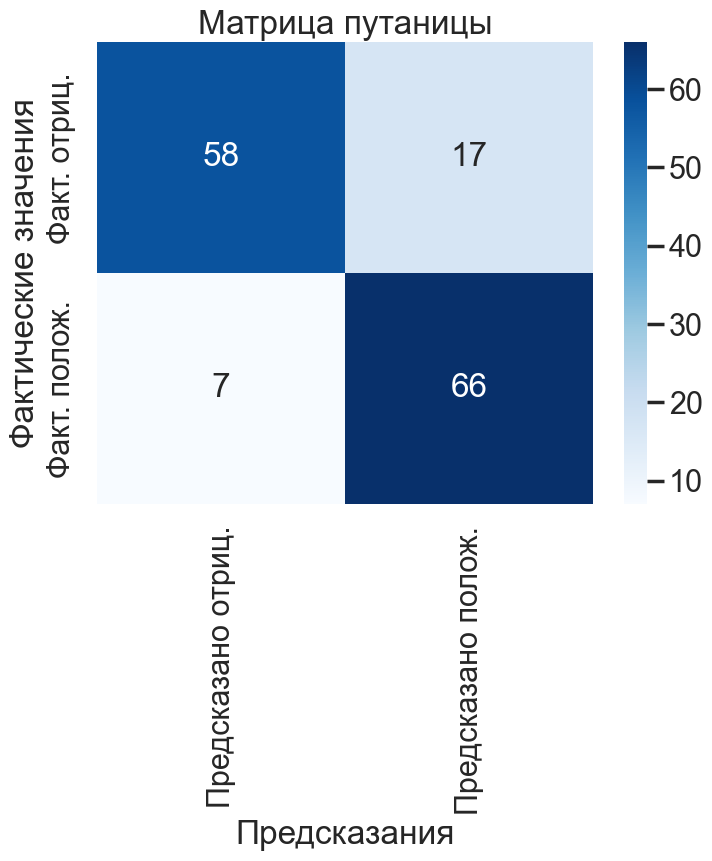

In [302]:
# Матрица путаницы
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Предсказано отриц.', 'Предсказано полож.'], yticklabels=['Факт. отриц.', 'Факт. полож.'])
plt.title('Матрица путаницы')
plt.xlabel('Предсказания')
plt.ylabel('Фактические значения')
plt.show()

### Улучшение модели

In [303]:
# Улучшение модели с помощью GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best)
best_recall = recall_score(y_test, y_pred_best)
best_f1 = f1_score(y_test, y_pred_best)
best_roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f'Лучшая точность: {best_accuracy}')
print(f'Лучшая прецизионность: {best_precision}')
print(f'Лучшая полнота: {best_recall}')
print(f'Лучший F1 Счет: {best_f1}')
print(f'Лучший ROC AUC Счет: {best_roc_auc}')

Лучшая точность: 0.8378378378378378
Лучшая прецизионность: 0.7951807228915663
Лучшая полнота: 0.9041095890410958
Лучший F1 Счет: 0.8461538461538461
Лучший ROC AUC Счет: 0.8933333333333333


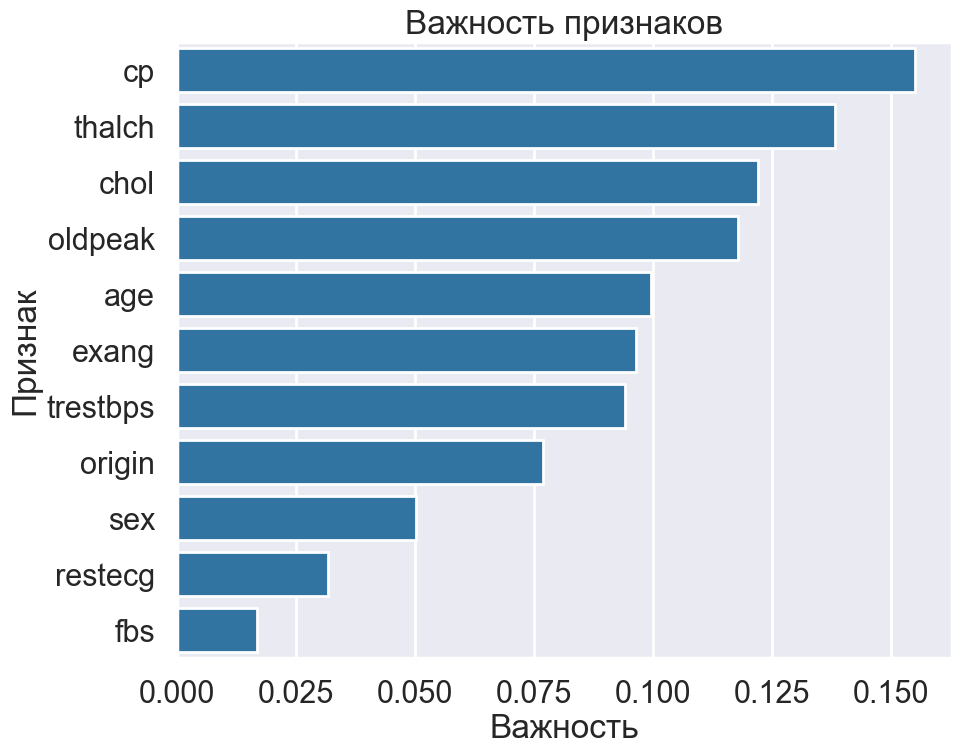

In [304]:
# Важность признаков
importances = best_model.feature_importances_
feature_names = X_encoded.columns

feature_importances = pd.DataFrame({'Признак': feature_names, 'Важность': importances})
feature_importances = feature_importances.sort_values(by='Важность', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Важность', y='Признак', data=feature_importances)
plt.title('Важность признаков')
plt.show()

### Построение ROC-кривой

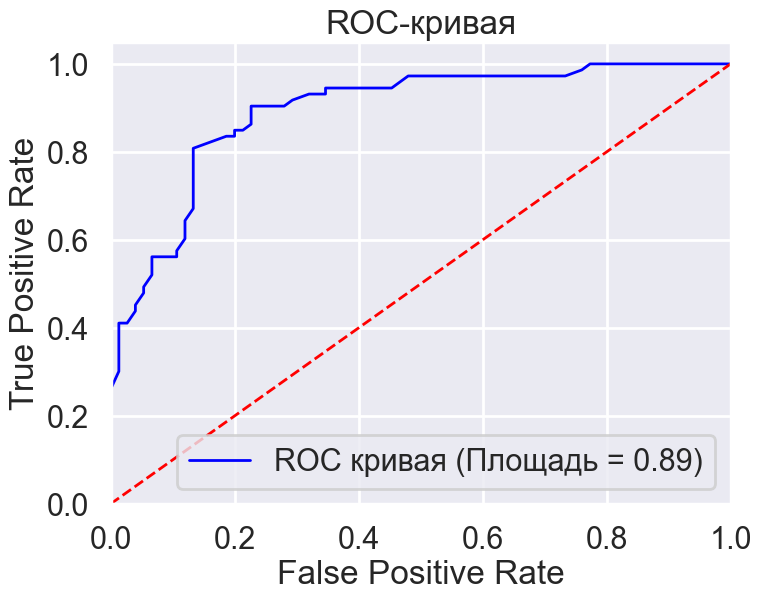

In [305]:
# Вычисление ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC кривая (Площадь = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()